In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps

In [ ]:
all=pd.read_csv("owid-covid-data.csv")
pd.unique(all["location"])

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [ ]:
France = all.loc[all['location'] == 'France']
France['date'] = pd.to_datetime(France['date'], dayfirst=True)
France_deaths_cases = France[['date', 'total_cases', 'total_deaths']]
France_deaths_cases

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,total_cases,total_deaths
63528,2020-01-24,2.0,NaN
63529,2020-01-25,3.0,NaN
63530,2020-01-26,3.0,NaN
63531,2020-01-27,3.0,NaN
63532,2020-01-28,4.0,NaN
...,...,...,...
64426,2022-07-10,32176376.0,150086.0
64427,2022-07-11,32427713.0,150248.0
64428,2022-07-12,32609987.0,150374.0
64429,2022-07-13,32737629.0,150483.0


In [ ]:
France_deaths_cases=France_deaths_cases.fillna(0)
France_deaths_cases_first = France_deaths_cases[:200]


In [ ]:
France_deaths_cases_year = France_deaths_cases[46:365]

,date,total_cases,total_deaths
63574,2020-03-10,1783.0,33.0
63575,2020-03-11,2293.0,48.0
63576,2020-03-12,2293.0,48.0
63577,2020-03-13,3678.0,79.0
63578,2020-03-14,4493.0,91.0
...,...,...,...
63888,2021-01-18,2955071.0,70698.0
63889,2021-01-19,2979094.0,71354.0
63890,2021-01-20,3005852.0,71664.0
63891,2021-01-21,3028439.0,72010.0


In [ ]:
print(France_deaths_cases_first.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 63528 to 63707
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          180 non-null    datetime64[ns]
 1   total_cases   180 non-null    float64       
 2   total_deaths  180 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 5.6 KB
None


Построим графики заболеваемости и смертности во франции за первые 180 дней

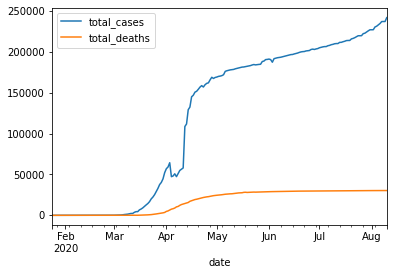

In [ ]:
France_deaths_cases_first.plot(x ='date')
plt.show()

Построим за первые 85 дней, когда ещё не было эфффекта карантинных мер( так как их в нашей модели не учитываем)

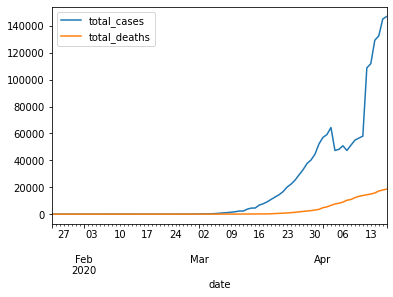

In [ ]:
France_deaths_cases=France_deaths_cases.fillna(0)
France_deaths_cases_first = France_deaths_cases[:85]
France_deaths_cases_first.plot(x ='date')
plt.show()

In [ ]:
a = np.array(France_deaths_cases_first['total_cases'].tolist())
b = np.array(France_deaths_cases_first['total_deaths'].tolist())

In [ ]:
from scipy.integrate import odeint

Берем модель SIR, Теперь решим систему ОДУ и подберем оптимальные параметры

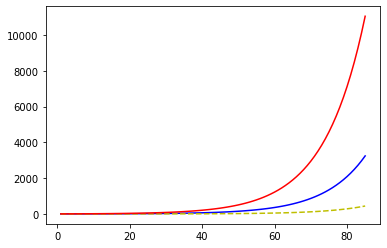

In [ ]:
beta = 0.3
gamma = 0.2
nu = 0.012
time = 85
t=np.linspace(1,time,time)
I0=2
D0=0
S0=68084217
R0=0
def ode(y, t):
        S, I, D, R = y
        dydt = [-beta*S*I/(S0-D),beta*S*I/(S0-D)-gamma*I-nu*I, nu*I, gamma*I]
        return dydt 
result3 = odeint(ode,[S0,I0,D0,R0],t) 
result3 = result3.T
plt.figure()
plt.plot(t, result3[1], 'b-')
plt.plot(t, result3[2], 'y--')
plt.plot(t, result3[3]+result3[1]+result3[2], 'r-')
plt.show()

Подбор оптимальных параметров для нахождения R0

In [ ]:
import time
from tqdm import tqdm

100%|██████████| 99/99 [00:00<00:00, 189.04it/s]


beta= 0.34199999999999997
gamma= 0.20400000000000001
nu= 0.015000000000000003


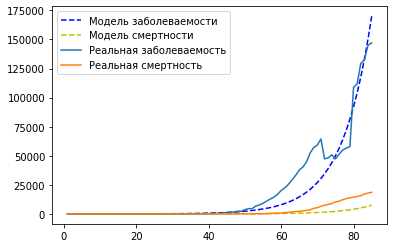

In [ ]:
tl=85
min=np.sum(np.abs(a-(result3[3]+result3[1]+result3[2]))+ np.abs(b-result3[2]))/tl
t=np.linspace(1,tl,tl)
def minimal(beta,gamma,nu):
    I0=2
    D0=0
    S0=68084217
    R0=0
    def ode(y, t):
            S, I, D, R = y
            dydt = [-beta*S*I/(S0-D),beta*S*I/(S0-D)-gamma*I-nu*I, nu*I, gamma*I]
            return dydt 
    result3 = odeint(ode,[S0,I0,D0,R0],t) 
    result3 = result3.T
    J = np.sum(np.abs(a-(result3[3]+result3[1]+result3[2])))/tl 
    return J
beta = 0.345
gamma = 0.2
nu = 0.012 
step = 0.001
for i in tqdm(range(1,100)):
    if minimal(beta+step, gamma,nu)<min:
        beta = beta+step
        min = minimal(beta, gamma,nu)
    if minimal(beta-step, gamma,nu)<min:
        beta = beta-step
        min = minimal(beta, gamma,nu)
    if minimal(beta, gamma+step,nu)<min:
        gamma = gamma+step
        min = minimal(beta, gamma,nu)
    if minimal(beta, gamma-step,nu)<min:
        gamma = gamma-step
        min = minimal(beta, gamma,nu)
    if minimal(beta, gamma,nu+step)<min:
        nu = nu+step
        min = minimal(beta, gamma,nu)   
    if minimal(beta, gamma,nu-step)<min:
        nu = nu-step
        min = minimal(beta, gamma,nu)
result3 = odeint(ode,[S0,I0,D0,R0],t) 
result3 = result3.T
print('beta=', beta)
print('gamma=', gamma)
print('nu=', nu)
plt.plot(t, result3[3]+result3[1]+result3[2], 'b--', label="Модель заболеваемости")
plt.plot(t, result3[2], 'y--', label="Модель смертности")
plt.plot(t,a, label="Реальная заболеваемость")
plt.plot(t,b, label="Реальная смертность")
plt.legend()
plt.show()


In [ ]:
R0 = beta/(gamma+nu)
print(R0)

1.561643835616438


In [ ]:
np.sum(np.abs(a-(result3[3]+result3[1]+result3[2]))/(result3[3]+result3[1]+result3[2]))/tl

0.6998972793833454

**Уложняем модель**

Нахождение насыщенности для SIR,R(t) доля переболевших для данной модели

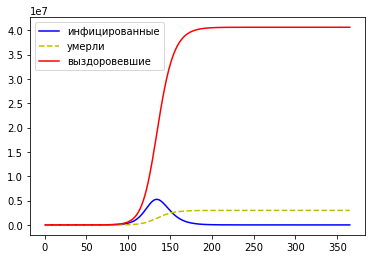

Переболело  40609791.905973084
Умерло  2986014.1107333144


In [ ]:
time = 365
t=np.linspace(1,time,time)
I0=2
D0=0
S0=68084217
R0=0
def ode(y, t):
        S, I, D, R = y
        dydt = [-beta*S*I/(S0-D),beta*S*I/(S0-D)-gamma*I-nu*I, nu*I, gamma*I]
        return dydt 
result3 = odeint(ode,[S0,I0,D0,R0],t) 
result3 = result3.T
plt.figure()
plt.plot(t, result3[1], 'b-', label="инфицированные")
plt.plot(t, result3[2], 'y--', label="умерли")
plt.plot(t, result3[3], 'r-', label='выздоровевшие')
plt.legend()
plt.show()
print('Переболело ',result3[3][364])
print('Умерло ',result3[2][364])


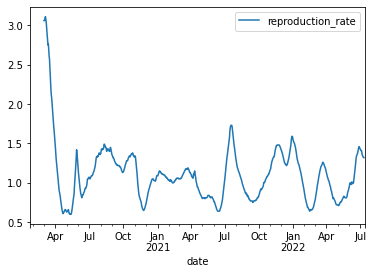

In [ ]:
France_rate = France[['date','reproduction_rate']]
France_rate.plot(x ='date')

Учет карантина

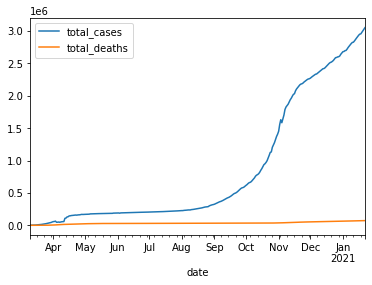

In [ ]:
France_deaths_cases_year.plot(x = 'date')

In [ ]:
c = np.array(France_deaths_cases_year['total_cases'].tolist())
d = np.array(France_deaths_cases_year['total_deaths'].tolist())

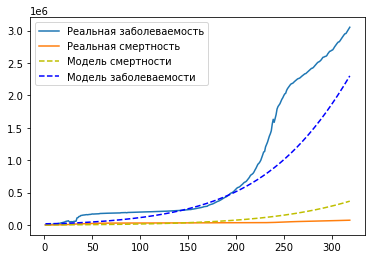

In [ ]:
beta = 0.35
ee = 0
eQ = 0
eJ = 0.4
gamma1 = 0.05
k1 = 0.09
k2 = 0.14
sigma1 = 0.0337
gamma2 =  0.25
sigma2= 0.05
d1 = 0.0079 
d2 = 0.02
time = 319
t=np.linspace(1,time,time)
S0=68084217
E0= 13000
Q0=0
I0= 4500
J0=0
D0=0
R0=0
def ode(y, t):
        S, E, Q, I, J, D, R = y
        dydt = [-beta*(I+ee*E+eQ*Q+eJ*J)*S/(S0-D),
                beta*(I+ee*E+eQ*Q+eJ*J)*S/(S0-D)-(gamma1+k1)*E,
                gamma1*E-k2*Q,
                k1*E-(gamma2+sigma1+d1)*I,
                k2*Q-gamma1*I-(sigma2+d2)*J,
                d1*I+d2*J,
                sigma1*I+sigma2*J]
        return dydt 
result3 = odeint(ode,[S0,E0,Q0,I0,J0,D0,R0],t) 
result3 = result3.T
all_cases = result3[1]
for i in range(2,7):
    all_cases=all_cases+result3[i]   
plt.figure()
plt.plot(t,c, label="Реальная заболеваемость")
plt.plot(t,d, label="Реальная смертность")
plt.plot(t, result3[5], 'y--',label="Модель смертности")
plt.plot(t, all_cases,'b--', label="Модель заболеваемости")
plt.legend()
plt.show()

In [ ]:
tl = 319
np.sum(np.abs(c-(all_cases))+ np.abs(d-result3[5]))/tl

494014.9807896769

100%|██████████| 999/999 [00:22<00:00, 43.55it/s]


beta= 0.355
eJ= 0.403
d2= 0.016999999999999998


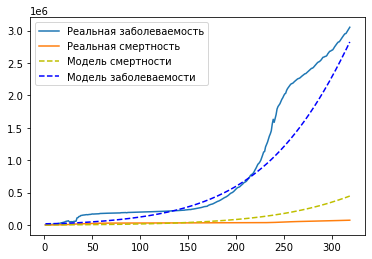

In [ ]:
tl=319
t=np.linspace(1,tl,tl)
min = np.sum(np.abs(c-(all_cases))+ np.abs(d-result3[5]))/tl
def minimal(beta,eJ,d2):
    ee = 0
    eQ = 0
    gamma1 = 0.05
    k1 = 0.09
    k2 = 0.14
    sigma1 = 0.0337
    gamma2 =  0.25
    sigma2= 0.05
    d1 = 0.0079 
    time = 319
    t=np.linspace(1,time,time)
    S0=68084217
    E0= 13000
    Q0=0
    I0= 4500
    J0=0
    D0=0
    R0=0
    def ode(y, t):
            S, E, Q, I, J, D, R = y
            dydt = [-beta*(I+ee*E+eQ*Q+eJ*J)*S/(S0-D),
                    beta*(I+ee*E+eQ*Q+eJ*J)*S/(S0-D)-(gamma1+k1)*E,
                    gamma1*E-k2*Q,
                    k1*E-(gamma2+sigma1+d1)*I,
                    k2*Q-gamma1*I-(sigma2+d2)*J,
                    d1*I+d2*J,
                    sigma1*I+sigma2*J]
            return dydt 
    result3 = odeint(ode,[S0,E0,Q0,I0,J0,D0,R0],t) 
    result3 = result3.T
    all_cases = result3[1]
    for i in range(2,7):
        all_cases=all_cases+result3[i]
    J = np.sum(np.abs(c-(all_cases))+ np.abs(d-result3[5]))/tl
    return J
beta = 0.353
gamma = 0.4
nu = 0.02 
step = 0.001
for i in tqdm(range(1,1000)):
    if minimal(beta+step, gamma,nu)<min:
        beta = beta+step
        min = minimal(beta, gamma,nu)
    if minimal(beta-step, gamma,nu)<min:
        beta = beta-step
        min = minimal(beta, gamma,nu)
    if minimal(beta, gamma+step,nu)<min:
        gamma = gamma+step
        min = minimal(beta, gamma,nu)
    if minimal(beta, gamma-step,nu)<min:
        gamma = gamma-step
        min = minimal(beta, gamma,nu)
    if minimal(beta, gamma,nu+step)<min:
        nu = nu+step
        min = minimal(beta, gamma,nu)   
    if minimal(beta, gamma,nu-step)<min:
        nu = nu-step
        min = minimal(beta, gamma,nu)
result3 = odeint(ode,[S0,E0,Q0,I0,J0,D0,R0],t) 
result3 = result3.T
all_cases = result3[1]
for i in range(2,7):
    all_cases=all_cases+result3[i]
print('beta=', beta)
print('eJ=', gamma)
print('d2=', nu)
plt.figure()
plt.plot(t,c, label="Реальная заболеваемость")
plt.plot(t,d, label="Реальная смертность")
plt.plot(t, result3[5], 'y--',label="Модель смертности")
plt.plot(t, all_cases,'b--', label="Модель заболеваемости")
plt.legend()
plt.show()